In [ ]:
!pip install neat-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 44 kB 2.1 MB/s 


# импорт необходимых библиотек

In [ ]:
from __future__ import print_function
import os
import neat

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Магистер/Семестр2/Нейроэволюционные вычисления/diabetes_data_upload.csv")
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [ ]:
#Преобразование в числовое значение
df['Gender'].replace(['Female', 'Male'],[0, 1], inplace=True)
df['Polyuria'].replace(['No', 'Yes'],[0, 1], inplace=True)
df['Polydipsia'].replace(['No', 'Yes'],[0, 1], inplace=True)
df['sudden weight loss'].replace(['No', 'Yes'],[0, 1], inplace=True)
df['weakness'].replace(['No', 'Yes'],[0, 1], inplace=True)
df['Polyphagia'].replace(['No', 'Yes'],[0, 1], inplace=True)
df['Genital thrush'].replace(['No', 'Yes'],[0, 1], inplace=True)
df['visual blurring'].replace(['No', 'Yes'],[0, 1], inplace=True)
df['Itching'].replace(['No', 'Yes'],[0, 1], inplace=True)
df['Irritability'].replace(['No', 'Yes'],[0, 1], inplace=True)
df['Itching'].replace(['No', 'Yes'],[0, 1], inplace=True)
df['delayed healing'].replace(['No', 'Yes'],[0, 1], inplace=True)
df['partial paresis'].replace(['No', 'Yes'],[0, 1], inplace=True)
df['muscle stiffness'].replace(['No', 'Yes'],[0, 1], inplace=True)
df['Alopecia'].replace(['No', 'Yes'],[0, 1], inplace=True)
df['Obesity'].replace(['No', 'Yes'],[0, 1], inplace=True)
df['class'].replace(['Negative', 'Positive'],[0, 1], inplace=True)

In [ ]:
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


# предварительная обработка данных

In [ ]:
#Разделение целевой переменной
data=df.loc[:,'Age':'Obesity']
target = df[['class']]

In [ ]:
target

,class
0,1
1,1
2,1
3,1
4,1
...,...
515,1
516,1
517,1
518,0


In [ ]:
from sklearn.preprocessing import StandardScaler
data = StandardScaler().fit_transform(data)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42)

In [ ]:
x_train_d = pd.DataFrame(x_train)
x_test_d = pd.DataFrame(x_test)
y_train_d = pd.DataFrame(y_train)
y_test_d = pd.DataFrame(y_test)

In [ ]:
len(x_train_d)

364

In [ ]:
x_train_d = x_train_d.to_records(index=False)
x_train_d = list(x_train_d)
print(x_train_d)

x_test_d = x_test_d.to_records(index=False)
x_test_d = list(x_test_d)
print(x_test_d)

y_train_d = y_train_d.to_records(index=False)
y_train_d = list(y_train_d)
print(y_train_d)

y_test_d = y_test_d.to_records(index=False)
y_test_d = list(y_test_d)
print(y_test_d)

[(-1.56747915, 0.76509206, -0.99233705, -0.90102535, -0.84626923, 0.83959397, -0.91512613, -0.53584393, -0.90102535, -0.97342978, -0.56550593, -0.9222439, -0.86991767, -0.77459667, -0.72451824, -0.45133547), (-0.99086226, -1.30703226, 1.00772212, 1.10984668, -0.84626923, 0.83959397, 1.09274555, -0.53584393, 1.10984668, 1.02729546, -0.56550593, 1.08431186, 1.14953407, -0.77459667, -0.72451824, -0.45133547), (0.7389884, 0.76509206, -0.99233705, -0.90102535, -0.84626923, -1.19105191, 1.09274555, -0.53584393, 1.10984668, -0.97342978, -0.56550593, -0.9222439, -0.86991767, 1.29099445, -0.72451824, -0.45133547), (1.97459601, 0.76509206, 1.00772212, -0.90102535, -0.84626923, -1.19105191, 1.09274555, -0.53584393, 1.10984668, 1.02729546, -0.56550593, 1.08431186, 1.14953407, 1.29099445, 1.38022749, -0.45133547), (-0.00237617, 0.76509206, -0.99233705, 1.10984668, 1.18165704, 0.83959397, -0.91512613, -0.53584393, 1.10984668, 1.02729546, 1.76832806, 1.08431186, -0.86991767, -0.77459667, -0.72451824,

# определение функций рисования

In [ ]:
from __future__ import print_function

import copy
import warnings

import graphviz
import matplotlib.pyplot as plt
import numpy as np


def plot_stats(statistics, ylog=False, view=True, filename='avg_fitness.svg'):
    """ Plots the population's average and best fitness. """
    if plt is None:
        warnings.warn("This display is not available due to a missing optional dependency (matplotlib)")
        return

    generation = range(len(statistics.most_fit_genomes))
    best_fitness = [c.fitness for c in statistics.most_fit_genomes]
    avg_fitness = np.array(statistics.get_fitness_mean())
    stdev_fitness = np.array(statistics.get_fitness_stdev())
    fig, ax = plt.subplots(figsize =(14, 6))
    plt.plot(generation, avg_fitness, 'b-', label="average")
    plt.plot(generation, avg_fitness - stdev_fitness, 'g-.', label="-1 sd")
    plt.plot(generation, avg_fitness + stdev_fitness, 'g-.', label="+1 sd")
    plt.plot(generation, best_fitness, 'r-', label="best")

    plt.title("Population's average and best fitness")
    plt.xlabel("Generations")
    plt.ylabel("Fitness")
    plt.grid()
    plt.legend(loc="best")
    if ylog:
        plt.gca().set_yscale('symlog')

    plt.savefig(filename)
    if view:
        plt.show()



def plot_spikes(spikes, view=True, filename=None, title=None):
    """ Plots the trains for a single spiking neuron. """
    t_values = [t for t, I, v, u, f in spikes]
    v_values = [v for t, I, v, u, f in spikes]
    u_values = [u for t, I, v, u, f in spikes]
    I_values = [I for t, I, v, u, f in spikes]
    f_values = [f for t, I, v, u, f in spikes]

    fig = plt.figure()
    plt.subplot(4, 1, 1)
    plt.ylabel("Potential (mv)")
    plt.xlabel("Time (in ms)")
    plt.grid()
    plt.plot(t_values, v_values, "g-")

    if title is None:
        plt.title("Izhikevich's spiking neuron model")
    else:
        plt.title("Izhikevich's spiking neuron model ({0!s})".format(title))

    plt.subplot(4, 1, 2)
    plt.ylabel("Fired")
    plt.xlabel("Time (in ms)")
    plt.grid()
    plt.plot(t_values, f_values, "r-")

    plt.subplot(4, 1, 3)
    plt.ylabel("Recovery (u)")
    plt.xlabel("Time (in ms)")
    plt.grid()
    plt.plot(t_values, u_values, "r-")

    plt.subplot(4, 1, 4)
    plt.ylabel("Current (I)")
    plt.xlabel("Time (in ms)")
    plt.grid()
    plt.plot(t_values, I_values, "r-o")

    if filename is not None:
        plt.savefig(filename)

    if view:
        plt.show()
        plt.close()
        fig = None

    return fig


def plot_species(statistics, view=False, filename='speciation.svg'):
    """ Visualizes speciation throughout evolution. """
    if plt is None:
        warnings.warn("This display is not available due to a missing optional dependency (matplotlib)")
        return

    species_sizes = statistics.get_species_sizes()
    num_generations = len(species_sizes)
    curves = np.array(species_sizes).T
 

    fig, ax = plt.subplots(figsize =(14, 6))
    ax.stackplot(range(num_generations), *curves)

    plt.title("Speciation")
    plt.ylabel("Size per Species")
    plt.xlabel("Generations")

    plt.savefig(filename)

    if view:
        plt.show()

    plt.close()


def draw_net(config, genome, view=False, filename="/content/drive/MyDrive/master 2nd s/neuroev/net", node_names=None, show_disabled=False, prune_unused=False,
             node_colors=None, fmt='png'):
    """ Receives a genome and draws a neural network with arbitrary topology. """
  
    if graphviz is None:
        warnings.warn("This display is not available due to a missing optional dependency (graphviz)")
        return

    if node_names is None:
        node_names = {}

    assert type(node_names) is dict

    if node_colors is None:
        node_colors = {}

    assert type(node_colors) is dict

    node_attrs = {
        'shape': 'circle',
        'fontsize': '9',
        'height': '0.2',
        'width': '0.2'}

    dot = graphviz.Digraph(format=fmt, node_attr=node_attrs)

    inputs = set()
    for k in config.genome_config.input_keys:
        inputs.add(k)
        name = node_names.get(k, str(k))
        input_attrs = {'style': 'filled', 'shape': 'box', 'fillcolor': node_colors.get(k, 'lightgray')}
        dot.node(name, _attributes=input_attrs)

    outputs = set()
    for k in config.genome_config.output_keys:
        outputs.add(k)
        name = node_names.get(k, str(k))
        node_attrs = {'style': 'filled', 'fillcolor': node_colors.get(k, 'lightblue')}

        dot.node(name, _attributes=node_attrs)

    if prune_unused:
        connections = set()
        for cg in genome.connections.values():
            if cg.enabled or show_disabled:
                connections.add((cg.in_node_id, cg.out_node_id))

        used_nodes = copy.copy(outputs)
        pending = copy.copy(outputs)
        while pending:
            new_pending = set()
            for a, b in connections:
                if b in pending and a not in used_nodes:
                    new_pending.add(a)
                    used_nodes.add(a)
            pending = new_pending
    else:
        used_nodes = set(genome.nodes.keys())

    for n in used_nodes:
        if n in inputs or n in outputs:
            continue

        attrs = {'style': 'filled',
                 'fillcolor': node_colors.get(n, 'white')}
        dot.node(str(n), _attributes=attrs)

    for cg in genome.connections.values():
        if cg.enabled or show_disabled:

            input, output = cg.key
            a = node_names.get(input, str(input))
            b = node_names.get(output, str(output))
            style = 'solid' if cg.enabled else 'dotted'
            color = 'green' if cg.weight > 0 else 'red'
            width = str(0.1 + abs(cg.weight / 5.0))
            dot.edge(a, b, _attributes={'style': style, 'color': color, 'penwidth': width})
    
    dot.render(filename, view=view)


    return dot

# определение функции фитнеса

Streaming output truncated to the last 5000 lines.
   213   14     2    302.3    0.772    11
   214   13     3    307.6    0.848     7
   215   13     2    301.0    0.647    11
   216   12     2    291.0    0.733    11
   217   12     2    304.3    0.475    11
   218   12     2    304.4    0.835    10
   219    9     2    291.0    0.778     0
   220    9     3    317.3    0.844     2
   221    7     2    302.2    0.782     0
   222    6     2    190.1    0.287     5
   223    6     2    283.6    0.622     4
   224    6     3    322.4    0.843     1
   225    6     2    317.8    0.894     5
   226    5     2    271.3    0.678     3
   227    4     3    301.5    0.709     3
   228    1     2    301.0    0.824     0
   229    1     1    301.0    0.824     0
   230    1     2    146.0    0.118     0
   231    1     2    146.0    0.118     0
   232    1     2    316.2    0.893     0
   233    0     1       --       --     0
Total extinctions: 0
Generation time: 1.199 sec (1.223 average)
Sav

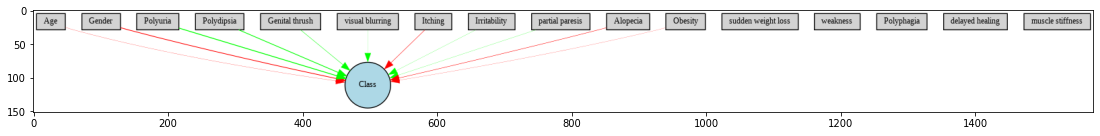

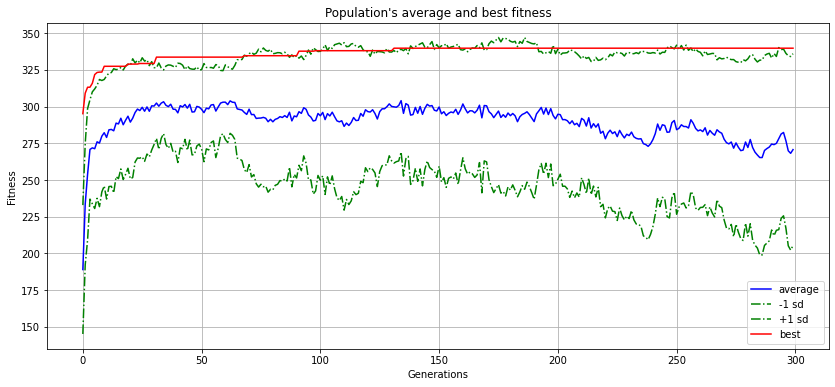

In [ ]:
#функции фитнеса
import time
inputs = x_train_d
outputs = y_train_d

def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        genome.fitness = 364.0
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        for xi, xo in zip(inputs, outputs):
            output = net.activate(xi)
            genome.fitness -= (output[0] - xo[0]) ** 2


def run(config_file):

    start= time.perf_counter()
    config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                         neat.DefaultSpeciesSet, neat.DefaultStagnation,
                         config_file)

    p = neat.Population(config)
    p.add_reporter(neat.StdOutReporter(True))
    stats = neat.StatisticsReporter()
    p.add_reporter(stats)
    p.add_reporter(neat.Checkpointer(5))
    winner = p.run(eval_genomes, 300)


    print('\nBest genome:\n{!s}'.format(winner))

    print('\nOutput of testing:')
    winner_net = neat.nn.FeedForwardNetwork.create(winner, config)
    pred_output = []
    for xi, xo in zip(x_test_d, y_test_d):
        output = winner_net.activate(xi)
        pred_output.append(1 if float(output[0])> 0.5 else 0)
        print("input {!r}, expected output {!r}, got {!r}".format(xi, xo, 1 if float(output[0])> 0.5 else 0))
    
    from sklearn import metrics

    print("\nAccuracy:",metrics.accuracy_score(y_test, pred_output)*100, "\n")
    finish = (time.perf_counter())
    print("The time needed to get the best network and to test it is: ", finish-start, ' s')

    node_names = {-1:'Age', -2: 'Gender',-3:'Polyuria',\
                  -4:'Polydipsia',-5:'sudden weight loss',\
                  -6:'weakness',-7:'Polyphagia',\
                  -8:'Genital thrush',-9:'visual blurring',\
                  -10:'Itching',\
                  -11:'Irritability',\
                  -12:'delayed healing',-13:'partial paresis', -14:'muscle stiffness',\
                  -15: 'Alopecia', -16:'Obesity', 0:'Class'}



    p = neat.Checkpointer.restore_checkpoint('neat-checkpoint-4')
    p.run(eval_genomes, 10)


    z = draw_net(config, winner, True, node_names=node_names)
    fig, ax = plt.subplots(figsize =(19, 18))
    img = mpimg.imread('/content/drive/MyDrive/master 2nd s/neuroev/net.png')
    imgplot = plt.imshow(img)
    plt.show()
    plot_stats(stats, ylog=False, view=True)
        

if __name__ == '__main__':
    run("/content/drive/MyDrive/Магистер/Семестр2/Нейроэволюционные вычисления/config.txt")